# MountainCar-v0: Задача обучения с подкреплением

## 1. Выбор задачи
MountainCar (Горный автомобиль)  

**Цель задачи** 

Это классическая задача обучения с подкреплением управления с разреженными наградами.  Целью является обучение агента поднять машину на вершину холма за наимаеньшее число ходов, используя раскачивание для накопления энергии.  

**Почему задача подходит для RL?**  

- Требует стратегии для преодоления локальных минимумов (двигатель слишком слаб для прямого подъема)
- Награда выдается только при достижении цели, что стимулирует долгосрочное планирование 
- Идеальна для изучения алгоритмов Q-learning, DQN, SARSA





## 2. Подготовка среды и структура среды MountainCar-v0

### Установка программного обеспечения

Gymnasium (OpenAI Gym)  

pip install gymnasium pygame


### **Состояния**
- **Тип данных:** Вектор (непрерывные значения)
- **Параметры:**
  - `position` (координата машины): диапазон **[-1.2, 0.6]**
  - `velocity` (скорость машины): диапазон **[-0.07, 0.07]**
- **Пример состояния:** `[ -0.5, 0.03 ]` (машинка находится в центре левой части холма и медленно разгоняется)
- **Визуализация:** 2D-анимация 



### **Действия**
Агент может выполнять **3 дискретных действия**:
-  **0:** Движение влево (ускорение влево)
-  **1:** Нейтраль (бездействие)
-  **2:** Движение вправо (ускорение вправо)



### **Награды**
- **Основные правила:**
  - **-1** за каждый шаг (штраф за время)
  - **+100** при достижении вершины (положение машины ≥ 0.5)
- **Итоговый счет:** Сумма наград за эпизод



In [ ]:
import gymnasium as gym

# Создание среды визуализацией
env = gym.make("MountainCar-v0", render_mode="human")

# Инициализация среды и получение начального состояния
obs, _ = env.reset()   # obs - вектор наблюдений (позиция, скорость)
# Циклы взаимодействия с средой
for _ in range(1000):
    env.render()
    action = env.action_space.sample()  # Выбираем случайное действие
    obs, reward, done, _, _ = env.step(action)   # Выполнение  действия в среде и возврат значений на шаге
  
    if done:
        obs, _ = env.reset()  # Если эпизод завершен, сбрасываем результат
env.close()

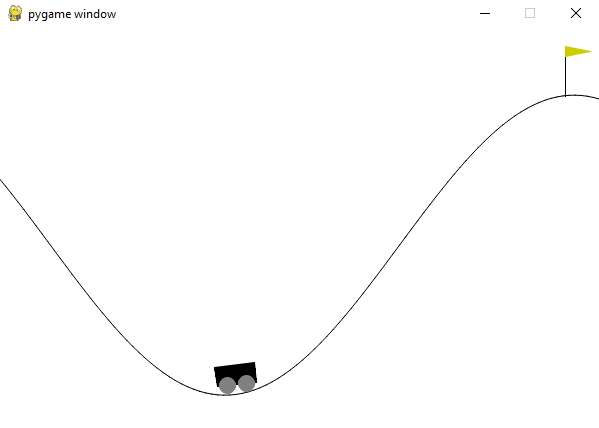